In [34]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/miniforge3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['gamma', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [35]:
from scipy.stats import norm
from numpy import *

In [36]:
def row_normalize(K):
    return (K.T/(sum(K,axis=1))).T
def col_normalize(K):
    return (K/(sum(K,axis=0)))
LV={}

In [37]:
def set_X_values(n,min=0,max=1):
    X=arange(min,max+1e-10,(max-min)/(n-1))
    if X.shape[0]>n:
        X=X[:n]
    return X

In [327]:
class solver:
    def __init__(self,n,sources,Tmatrix,gamma):
        self.n=n
        self.sources=sources
        self.size=n+sources+1
        self.Tmatrix=Tmatrix
        self.gamma=gamma
        self.set_K()
        self.V=zeros(self.size)
        self.history=[]
    def set_K(self):
        K=zeros([self.size,self.n])
        K[:-1,:]=self.Tmatrix
        K=col_normalize(K)
        K[-1,:]=self.gamma
        K[:-1,:]*=1-self.gamma
        self.K=K
        
    def iterate(self,Init=None, Fix=None,iterations=1,debug=False):
        """ A procedre for doing iterations. default, no initialization, 0 means all zeros.
        Init: the initialization values (length n),
        Fix: A binary vector defining which coordinates of V not to update: default update """
        if Init==0:
            V=zeros(self.size)
        elif not Init is None:
            V=Init
        else:
            V=self.V
            
        V[0:self.sources]=1; 
        V[-1]=0
        for i in range(iterations):
            V[self.sources:-1]=np.dot(V,self.K)
            self.V=array(V)
            self.trace(note=f'iteration {i}')
      
        
    from time import time
    def trace(self,note=''):
        V=self.V
        X=set_X_values(V.shape[0],0,4)
        self.history.append({
            'X':X,
            'V':V,
            'note':note,
            'time':time.time()
        })
            

In [328]:
def calc_kernel(n=100,sources=1,kernel_scale=0.05):
    x = linspace(norm.ppf(0.01),
        norm.ppf(0.99), 2*(n+sources+1))
    kernel = norm(scale=kernel_scale).pdf(x)

    ## define matrix
    Tmatrix=zeros([n+sources,n])
    for i in range(n+sources):
        for j in range(n):
            Tmatrix[i,j]=kernel[int(i-j+n)]

    return Tmatrix

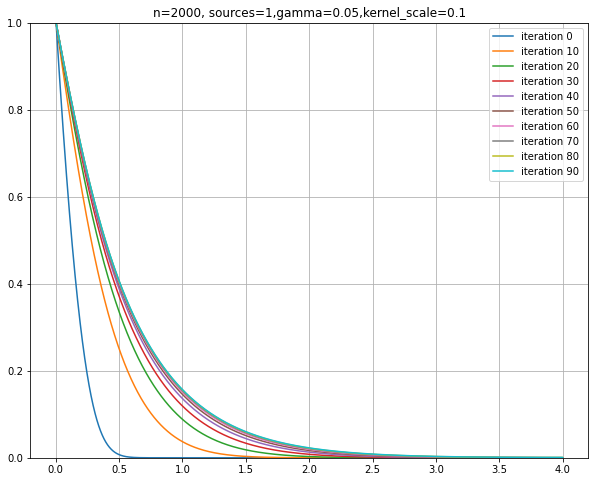

In [339]:
n=2000
sources=1
gamma=0.05
kernel_scale=0.1

Tmatrix=calc_kernel(n=n,sources=sources,kernel_scale=kernel_scale)
Tmatrix.shape,gamma

S=solver(n,sources,Tmatrix,gamma=gamma)
#imshow(S.K)

S.iterate(iterations=1000,debug=True)

figure(figsize=[10,8])
for R in S.history[:100:10]:
    X=R['X']
    V=R['V']
    note=R['note']
    plot(X,V/V[2],label=note)
legend()
grid()
ylim([0,1])
title(f'n={n}, sources={sources},gamma={gamma},kernel_scale={kernel_scale}');

In [300]:
for i in arange(-10,0,1):
    gamma=2.**i
    K=set_matrix(n=n,gamma=gamma,kernel_scale=kernel_scale)
    V=zeros(n+2)
    V[0:int(n/10)]=1; 
    V[-1]=0
    for i in range(1000):

        V[1:-1]=np.dot(V,K)
    small=V[int(0.8*n)]
    print(gamma,small)
    if small<1e-2:
        break
X=set_X_values(V.shape[0],0,4)
plot(X,V,label=str(i))

TypeError: set_matrix() got an unexpected keyword argument 'gamma'

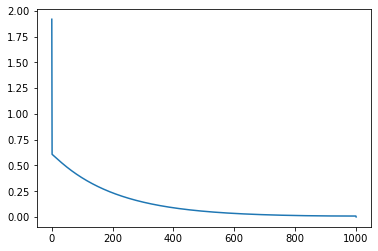

In [73]:
Vs=V/(sum(V)*gamma)
plot(Vs)

In [74]:
LV[n]=[X,Vs]

LV.keys()

dict_keys([100, 10, 1000])

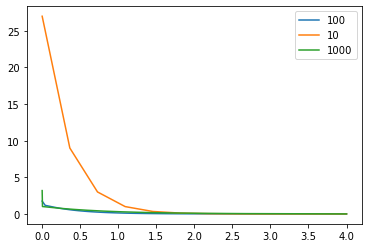

In [75]:
for key in LV:
    x,v=LV[key]
    plot(x,v/v[3],label=str(key))
legend()

In [275]:
mean(v)

0.006149229751054583